In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Palladium.csv')
df.head(5)

,Date,Open,Close,High,Low
0,3/26/2024,1008.0,995.5,1021.5,992.5
1,3/25/2024,986.0,1007.5,1027.0,985.5
2,3/24/2024,0.0,984.0,0.0,983.0
3,3/23/2024,992.5,992.5,992.5,992.5
4,3/22/2024,1008.5,992.5,1018.0,983.5


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df.head(5)

,Date,Open,Close,High,Low
1686,2019-03-01,1545.5,1551.5,1564.0,1529.0
1685,2019-03-03,1551.5,1549.5,1551.5,1549.5
1684,2019-03-04,1552.5,1535.5,1561.5,1515.5
1683,2019-03-05,1533.0,1514.5,1537.0,1505.5
1682,2019-03-06,1518.5,1535.0,1542.5,1507.0


In [4]:
df1=df.reset_index()['Close']
df1

0       1551.5
1       1549.5
2       1535.5
3       1514.5
4       1535.0
         ...  
1682     992.5
1683     992.5
1684     984.0
1685    1007.5
1686     995.5
Name: Close, Length: 1687, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\admin\anaconda3\envs\py39env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1219
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.001

In [12]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [14]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, ytest)
print('Testing MAPE:', test_mape)

#MSE
test_mse = mean_squared_error(y_pred, ytest)
print('Testing MSE:', test_mse)

Testing RMSE: 1116.3087578637194
Testing MAPE: 0.9999108035482553
Testing MSE: 1246131.5238332248


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.04593487 0.11171016 0.14492129 0.14492129 0.14492129 0.14362735
 0.16109554 0.15505715 0.15548846 0.15354755 0.15354755 0.15354755
 0.15354755 0.1388829  0.12508087 0.11861117 0.10437783 0.10437783
 0.10545611 0.09445762 0.09036015 0.07612681 0.07569549 0.07569549
 0.07569549 0.05908993 0.04981669 0.05758033 0.05240457 0.05003235
 0.05003235 0.05046366 0.04873841 0.03299547 0.02501617 0.03558335
 0.03752426 0.03752426 0.03752426 0.03407375 0.03687729 0.0483071
 0.03515204 0.04313133 0.04313133 0.04313133 0.05154195 0.05089498
 0.05844296 0.04744447 0.03773992 0.03773992 0.03773992 0.04075911
 0.0388182  0.01682122 0.01358637 0.00043131 0.00043131 0.00388182
 0.01552728 0.         0.03213284 0.03989648 0.03989648 0.03989648
 0.03989648 0.04097477 0.0547768  0.03946517 0.04766013 0.04960104
 0.04960104 0.04334699 0.03709295 0.02911365 0.03601466 0.04226871
 0.04270002 0.04701316 0.03558335 0.07957731 0.07677378 0.06944145
 0.07224499 0.07634246 0.07806772 0.08885055 0.0897

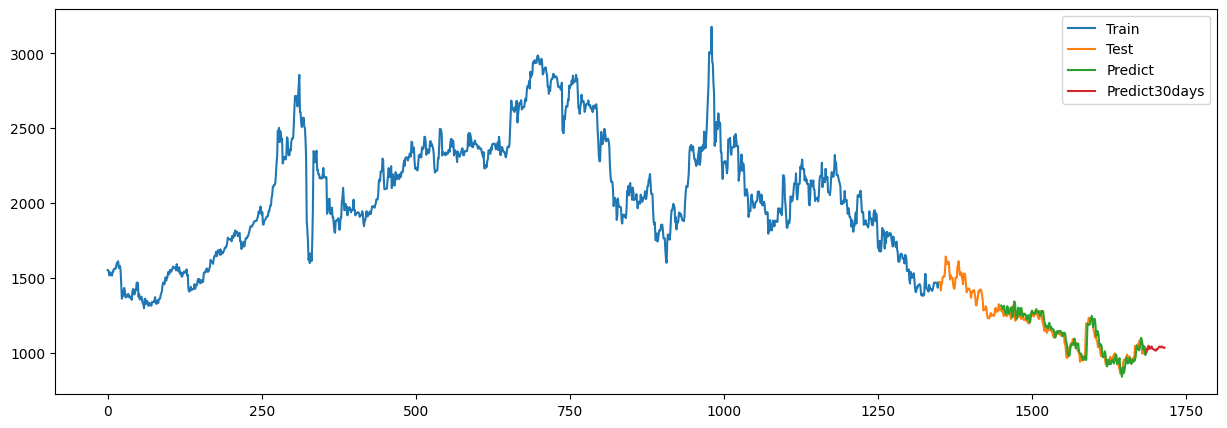

In [16]:
# 14.Vẽ hình
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()